# Introducción a la solución en diferencias finitas de PDEs

En este modulo, estudiaremos la solucion numerica de *ecuaciones diferenciales en derivadas parciales (PDEs)*, en las cuales la incognita es una funcion de 2 o mas variables. El problema puede depender del tiempo, $t$, y una dimension espacial $x$ (o mas), lo cual implica que requerimos construir una *grilla de discretizacion* para cada variable independiente.

## Advección lineal 1D

La ecuacion de *advección lineal unidimensional* se escribe:

$$
\begin{equation}
\frac{\partial u}{\partial t} + c \frac{\partial u}{\partial x} = 0
\end{equation}
$$

La misma representa una *onda* que se propaga con velocidad $c$ en la direccion $x$, sin cambio de forma. Con la condicion inicial $u(x,0)=u_0(x)$, la ecuacion tiene una solucion exacta dada por:

$$
\begin{equation}
u(x,t)=u_0(x-ct)
\end{equation}
$$

Podemos verificarlo tomando la derivada de la solucion en tiempo y espacio para luego reemplazar en la ecuacion diferencial.

Con respecto a la solucion exacta, observamos que: 

1. su forma no cambia, siendo siempre la misma que adopta la onda inicial, $u_0$, unicamente se encuentra desplazada en la direccion $x$; y

2. es constante a lo largo de las **curvas caracteristicas**, $x-ct=$constante. Esto implica que para cualquier punto en espacio y tiempo, es posible moverse sobre la curva caracteristica hasta $t=0$ para encontrar el valor de la solucion.

![characteristics](./figuras/characteristics.png)

## Diferencias Finitas

Consideremos un grafico *espacio-tiempo* en el cual las coordenadas en direccion vertical representan el avance en tiempo de $t^n$ a $t^{n+1}$ y las coordenadas en direccion horizontal el avance en espacio: puntos consecutivos $x_{i-1}$, $x_i$, y $x_{i+1}$. De esta forma generamos una *grilla* en la cual es posible asignar a un determinado punto un indice espacial y otro temporal:

$$
\begin{matrix}
t^{n+1} & \rightarrow & \bullet  && \bullet  && \bullet  \\
t^n & \rightarrow & \bullet  && \bullet  && \bullet  \\
& &  x_{i-1} && x_i && x_{i+1}
\end{matrix}
$$

La solucion numerica de $u(x,t)$ en el punto medio-superior se indica por $u^{n+1}_{i}$.

Un fragmento de grilla tendria los siguientes valores de la solucion numerica en cada punto:

$$
\begin{matrix}
& &\bullet & & \bullet & &  \bullet \\
& &u^{n+1}_{i-1} & & u^{n+1}_i & & u^{n+1}_{i+1} \\
& &\bullet & & \bullet & &  \bullet \\
& &u^n_{i-1} & & u^n_i & & u^n_{i+1} \\
& &\bullet & & \bullet & &  \bullet \\
& &u^{n-1}_{i-1} & & u^{n-1}_i & & u^{n-1}_{i+1} \\
\end{matrix}
$$

Una forma alternativa de denotar nuestra grilla de discretizacion consiste en indicar que la misma se construye con pasos constantes en tiempo y espacio, $\Delta t$ y $\Delta x$, como sigue:

$$
\begin{aligned}
x_i &= i\, \Delta x \quad \text{y} \quad t^n = n\, \Delta t \\
u_i^n &= u(i\, \Delta x, n\, \Delta t)
\end{aligned}
$$


### Discretizando nuestra ecuacion de modelo

Veamos como discretizar la ecuacion de adveccion lineal 1D tanto en tiempo como en espacio. En primer lugar discretizamos la coordenada espacial $x$ en puntos indexados de $i=0$ a $N$, para luego dar un *paso* en intervalos de tiempo discretos de tamaño $\Delta t$.

A partir de la definicion de derivada sabemos que para $\Delta x$ suficientemente pequeño:

$$
\begin{equation}
\frac{\partial u}{\partial x}\approx \frac{u(x+\Delta x)-u(x)}{\Delta x}
\end{equation}
$$

Esta formula podria ser aplicada en todo punto $x_i$. Pero notemos que no es el unico modo en el cual es posible estimar la derivada.

En efecto, la interpretacion geometrica de la derivada primera $\partial u/ \partial x$ consiste en su representacion de la pendiente de la tangente a la curva $u(x)$. En la siguiente figura se ilustra la linea tangente en el punto $x_i$ y se marca como *exacta*. Si la formula anterior se aplica en $x_i$, esta aproxima la derivada empleando el proximo punto espacial de la grilla: se trata entonces de un operador en diferencias *hacia adelante*.
Si en cambio estimamos la derivada empleando el punto detras de $x_i$, obtenemos un operador en diferencias *hacia atras*.
En caso de emplear ambos puntos a cada lado de $x_i$, resulta un operador en diferencias *centrado* (pero en este caso el denominador seria $2\Delta x$).

![FDapproximations](./figuras/FDapproximations.png)

En resumen, tendremos 3 formas posibles de representar una forma discreta de $\partial u/ \partial x$:

* diferencia en adelanto (*forward*): usa $x_i$ y $x_i + \Delta x$,
* diferencia en atraso (*backward*): usa $x_i$ y $x_i- \Delta x$,
* diferencia centrada: usa ambos puntos a cada lado de $x_i$.

Las 3 formulas son:

$$
\begin{aligned}
\frac{\partial u}{\partial x} &\approx \frac{u(x_{i+1}) - u(x_i)}{\Delta x} && \text{Forward} \\
\frac{\partial u}{\partial x} &\approx \frac{u(x_i) - u(x_{i-1})}{\Delta x} && \text{Backward} \\
\frac{\partial u}{\partial x} &\approx \frac{u(x_{i+1}) - u(x_{i-1})}{2 \Delta x} && \text{Central}
\end{aligned}
$$

Si adoptamos una diferencia en adelanto para la derivada temporal y una diferencia en atraso para la derivada espacial, nuestra ecuacion discreta queda:

$$
\begin{equation}
\frac{u_i^{n+1}-u_i^n}{\Delta t} + c \frac{u_i^n - u_{i-1}^n}{\Delta x} = 0
\end{equation}
$$

Resolviendo esta discretizacion para la unica incognita $u_i^{n+1}$ (dadas las condiciones iniciales) obtenemos una ecuacion que nos permite dar un paso en tiempo, como sigue:

$$
u_i^{n+1} = u_i^n - c \frac{\Delta t}{\Delta x}(u_i^n - u_{i-1}^n)
$$

A continuacion se ilustra la **grilla de calculo** (*stencil*) que nos permite resolver nuestra ecuacion de modelo empleando el esquema en diferencias citado (*forward-time/backward-space*):

![FTBS_stencil](./figuras/FTBS_stencil.png)

## Ejemplo

En primer lugar, importamos las librerias Python requeridas:

In [ ]:
import numpy
from matplotlib import pyplot
%matplotlib inline

Tambien fijamos parametros para graficar modificando entradas del diccionario `rcParams`:

In [ ]:
# Set the font family and size to use for Matplotlib figures
pyplot.rcParams['font.family'] = 'serif'
pyplot.rcParams['font.size'] = 16

Resolveremos la ecuacion de conveccion 1D lineal con una condicion inicial tipo *square wave*, definida como:

$$
\begin{equation}
u(x,0)=\begin{cases}2 & \text{where } 0.5\leq x \leq 1,\\
1 & \text{everywhere else in } (0, 2)
\end{cases}
\end{equation}
$$

Necesitamos ademas una condicion de borde en $x$: sea $u=1$ en $x=0$. Nuestro dominio espacial para la solucion numerica cubrira solo el rango $x\in(0,2)$.

![squarewave](./figuras/squarewave.png)

Ahora definamos unas cuantas variables. Deseamos construir una grilla equi-espaciada de puntos, siendo `nx` el numero de puntos de grilla espaciales, `dx` la distancia entre puntos adyacentes, `nt` el numero de pasos de tiempo, y `c` la velocidad de onda.  

In [ ]:
# Set parameters
nx = 41  # number of spatial discrete points
L = 2.0  # length of the 1D domain
dx = L/(nx-1)  # spatial grid size
nt = 25  # number of time steps
dt = 0.02  # time-step size
c = 1.0  # convection speed

# Define the grid point coordinates.
x = numpy.linspace(0.0,L,num=nx)

Requerimos ademas establecer la condicion inicial para conseguir la onda cuadrada (*square wave*). 
Podemos emplear la funcion [`numpy.where()`](https://docs.scipy.org/doc/numpy/reference/generated/numpy.where.html) que devuelve una lista de indices donde el vector $x$ satisface alguna condicion. 
La funcion [`numpy.logical_and()`](https://docs.scipy.org/doc/numpy/reference/generated/numpy.logical_and.html) calcula el valor verdadero de `x >= 0.5` **and** `x <= 1.0`, elemento por elemento.

In [ ]:
# Set initial conditions with 1.0 everywhere (for now)
u0 = numpy.ones(nx)
# Get a list of indices where 0.5 <= x <= 1.0
mask = numpy.where(numpy.logical_and(x >= 0.5, x <= 1.0))
print(mask)

(array([10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20]),)


Ahora podemos entonces actualizar nuestra condicion inicial para conseguir la forma *square-wave*.

In [ ]:
# Set initial condition u = 2.0 where 0.5 <= x <= 1.0
u0[mask] = 2.0
print(u0)

[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]


Grafiquemos la condicion inicial obtenida.

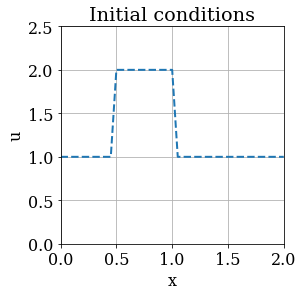

In [ ]:
# Plot the initial conditions
pyplot.figure(figsize=(4.0,4.0))
pyplot.title('Initial conditions')
pyplot.xlabel('x')
pyplot.ylabel('u')
pyplot.grid()
pyplot.plot(x,u0,color='C0',linestyle='--',linewidth=2)
pyplot.xlim(0.0,L)
pyplot.ylim(0.0,2.5);

Ahora escribamos codigo para la forma discreta de la ecuacion de conveccion empleando el esquema en diferencias adoptado. 

Para cada elemento del vector `u`, debemos efectuar la operacion: 

$$
u_i^{n+1} = u_i^n - c \frac{\Delta t}{\Delta x}(u_i^n-u_{i-1}^n)
$$

Almacenamos el resultado en un nuevo (temporario) vector `un`, el cual contiene la solucion $u$ para el proximo paso de tiempo.
Entonces, podemos imaginar 2 operaciones iterativas: una en espacio y otra en tiempo, con un bucle espacial dentro del bucle temporal, como se muestra a continuacion: 

In [ ]:
u = u0.copy()
for n in range(1, nt):
    un = u.copy()
    for i in range(1, nx):
        u[i] = un[i] - c * dt / dx * (un[i] - un[i - 1])

Ahora graficamos el vector solucion al cabo de un avance de $nt$ pasos de tiempo.

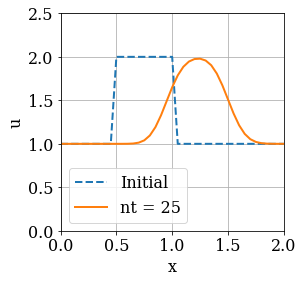

In [ ]:
# Plot the solution after nt time steps
# along with the initial conditions.
pyplot.figure(figsize=(4.0,4.0))
pyplot.xlabel('x')
pyplot.ylabel('u')
pyplot.grid()
pyplot.plot(x,u0,label='Initial',
            color='C0',linestyle='--',linewidth=2)
pyplot.plot(x,u,label='nt = {}'.format(nt),
            color='C1',linestyle='-',linewidth=2)
pyplot.legend()
pyplot.xlim(0.0,L)
pyplot.ylim(0.0,2.5);

<div class="alert alert-block alert-danger">
That's funny. Our square wave has definitely moved to the right, but it's no longer in the shape of a top-hat. What's going on?
</div>

##### Dig deeper

<div class="alert alert-block alert-success">
The solution differs from the expected square wave because the discretized equation is an approximation of the continuous differential equation that we want to solve. There are errors: we knew that. But the modified shape of the initial wave is something curious. Maybe it can be improved by making the grid spacing finer. Why don't you try it? Does it help?
</div>   

## Error de truncamiento espacial

Consideremos la aproximacion en diferencias finitas que estamos empleando para la derivada espacial:

\begin{equation}
\frac{\partial u}{\partial x}\approx \frac{u(x+\Delta x)-u(x)}{\Delta x}
\end{equation}

Si efectuamos un desarrollo en serie de Taylor para los terminos espaciales, vemos que el esquema en atraso (*backward*) produce un metodo de primer orden en espacio:

$$
\begin{equation}
\frac{\partial u}{\partial x}(x_i) = \frac{u(x_i)-u(x_{i-1})}{\Delta x} + \frac{\Delta x}{2} \frac{\partial^2 u}{\partial x^2}(x_i) - \frac{\Delta x^2}{6} \frac{\partial^3 u}{\partial x^3}(x_i)+ \cdots
\end{equation}
$$

Esto es, el termino dominante que se desestima durante la aproximacion en diferencias es de orden $\mathcal{O}(\Delta x)$. 
En resumen, el esquema en diferencias adoptado *forward-time/backward space* es de primer orden tanto en espacio como en tiempo: los errores de truncamiento son $\mathcal{O}(\Delta t, \Delta x)$. 

## Adveccion No Lineal

La ecuacion de adveccion 1D **no lineal** se obtiene reemplazando la velocidad de onda constante $c$ por la velocidad variable $u$:

$$
\begin{equation}
\frac{\partial u}{\partial t} + u \frac{\partial u}{\partial x} = 0
\end{equation}
$$

La misma es **no lineal** puesto que ahora tenemos el producto de la solucion y una de sus derivadas: $u\,\partial u/\partial x$. 

Usaremos el mismo esquema de discretizacion que hemos empleado para el caso lineal: diferencias hacia adelante en tiempo y hacia atras en espacio. La ecuacion discretizada resulta:

$$
\begin{equation}
\frac{u_i^{n+1}-u_i^n}{\Delta t} + u_i^n \frac{u_i^n-u_{i-1}^n}{\Delta x} = 0
\end{equation}
$$

Resolviendo para el unico termino incognita, $u_i^{n+1}$, obtenemos una ecuacion que nos permite avanzar en tiempo:

$$
\begin{equation}
u_i^{n+1} = u_i^n - u_i^n \frac{\Delta t}{\Delta x} (u_i^n - u_{i-1}^n)
\end{equation}
$$

Re-inicializemos la variable `u` y re-entremos los parametros numericos:

In [10]:
# Set parameters
nx = 41  # number of spatial discrete points
L = 2.0  # length of the 1D domain
dx = L/(nx-1)  # spatial grid size
nt = 10  # number of time steps
dt = 0.02  # time-step size

x = numpy.linspace(0.0,L,num=nx)
u0 = numpy.ones(nx)
mask = numpy.where(numpy.logical_and(x >= 0.5, x <= 1.0))
u0[mask] = 2.0

 Como luce la condicion inicial?

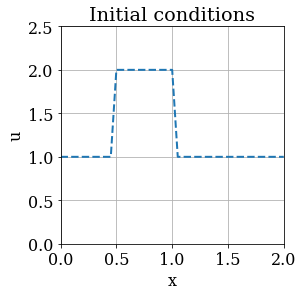

In [11]:
# Plot the initial conditions
pyplot.figure(figsize=(4.0,4.0))
pyplot.title('Initial conditions')
pyplot.xlabel('x')
pyplot.ylabel('u')
pyplot.grid()
pyplot.plot(x,u0,color='C0',linestyle='--',linewidth=2)
pyplot.xlim(0.0,L)
pyplot.ylim(0.0,2.5);

Cambiando unicamente una linea de codigo en la solucion de la adveccion lineal conseguiremos la solucion **no lineal**: aquella linea que corresponde a la ecuacion discreta ahora tiene `un[i]` en lugar de `c`. Por tanto podriamos escribir algo como:

```Python
for n in range(1,nt):  
  un = u.copy() 
  for i in range(1,nx): 
    u[i] = un[i] - un[i]*dt/dx*(un[i]-un[i-1]) 
```

Vamos a ser *mas elegantes* que aquello procurando usar NumPy para actualizar todos los valores de $u$ en la grilla espacial de una sola vez.

A continuacion se ilustra un esquema que explica la operacion *vectorizada* para $u_i-u_{i-1}$.

![vectorizedstencil](./figuras/vectorizedstencil.png)

In [12]:
# Compute the solution using Euler's method and array slicing
u = u0.copy()
for n in range(1,nt):
    u[1:] = u[1:] - dt/dx*u[1:]*(u[1:]-u[:-1])

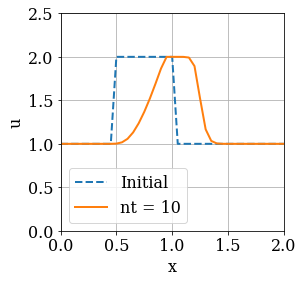

In [13]:
# Plot the solution after nt time steps
# along with the initial conditions.
pyplot.figure(figsize=(4.0,4.0))
pyplot.xlabel('x')
pyplot.ylabel('u')
pyplot.grid()
pyplot.plot(x,u0,label='Initial',
            color='C0',linestyle='--',linewidth=2)
pyplot.plot(x,u,label='nt = {}'.format(nt),
            color='C1',linestyle='-',linewidth=2)
pyplot.legend()
pyplot.xlim(0.0,L)
pyplot.ylim(0.0,2.5);

<div class="alert alert-block alert-danger">
Hmm. That's quite interesting: like in the linear case, we see that we have lost the sharp sides of our initial square wave, but there's more. Now, the wave has also lost symmetry! It seems to be lagging on the rear side, while the front of the wave is steepening. Is this another form of numerical error, do you ask? No! It's physics!    
</div>

##### Dig deeper

<div class="alert alert-block alert-success">
Think about the effect of having replaced the constant wave speed $c$ by the variable speed given by the solution $u$. It means that different parts of the wave move at different speeds. Make a sketch of an initial wave and think about where the speed is higher and where it is lower ...
</div>

## Referencias

* Elhage, Nelson (2015), ["Indices point between elements"](https://blog.nelhage.com/2015/08/indices-point-between-elements/)

###### The cell below loads the style of the notebook.

In [1]:
from IPython.core.display import HTML
css_file = '.././styles/numericalmoocstyle.css'
HTML(open(css_file, 'r').read())